# Keras チュートリアル

https://qiita.com/neet-AI/items/2b3d7f743e4d6c6d8e10

https://www.tensorflow.org/tutorials/images/classification


CNNでオリジナルデータの分類

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import random_rotation, random_shift, random_zoom
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPool2D
#from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Activation, Flatten
#from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow import keras
import tensorflow as tf

In [3]:
# ハイパーパラメータ
BATCH_SIZE = 32
WIDTH = 150
HIGHT = 150
IMG_SIZE = (WIDTH, HIGHT) #読み込んだ画像の縮小後のサイズ

In [4]:
# データの読み込み
from tensorflow.keras.preprocessing import image_dataset_from_directory

main_directory = "/notebooks/data/study/keras_tutorial/cats_and_dogs_filtered/"
train_directory = os.path.join(main_directory, 'train')
validation_directory = os.path.join(main_directory, 'validation')


train_dataset = image_dataset_from_directory(train_directory,
                                             shuffle = True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory(validation_directory,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [5]:
#ディレクトリ構造から自動でクラス名を推測している
train_dataset.class_names

['cats', 'dogs']

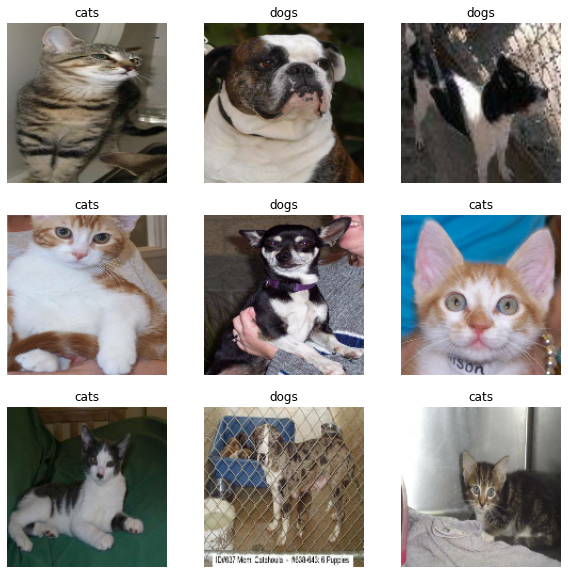

In [6]:
# 読み込んだデータの確認
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
#テストデータの作成
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [8]:
#検証セットで使用可能なデータのバッチ数
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 6


In [11]:
# モデルの構築
#def BuildCNN(ipshape=(32, 32, 3), num_classes=3):
inputs = keras.Input(shape=(WIDTH, HIGHT, 3))
x = Conv2D(16, (3, 3), padding='same', activation="relu")(inputs)
x = MaxPool2D()(x)
x = Conv2D(32, (3, 3), padding='same', activation="relu")(x)
x = MaxPool2D()(x)
x = Conv2D(64, (3, 3), padding='same', activation="relu")(x)
x = MaxPool2D()(x)
x =  Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=x, name="mnist_model")

In [16]:
#モデルのコンパイル
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
#モデルの確認
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        

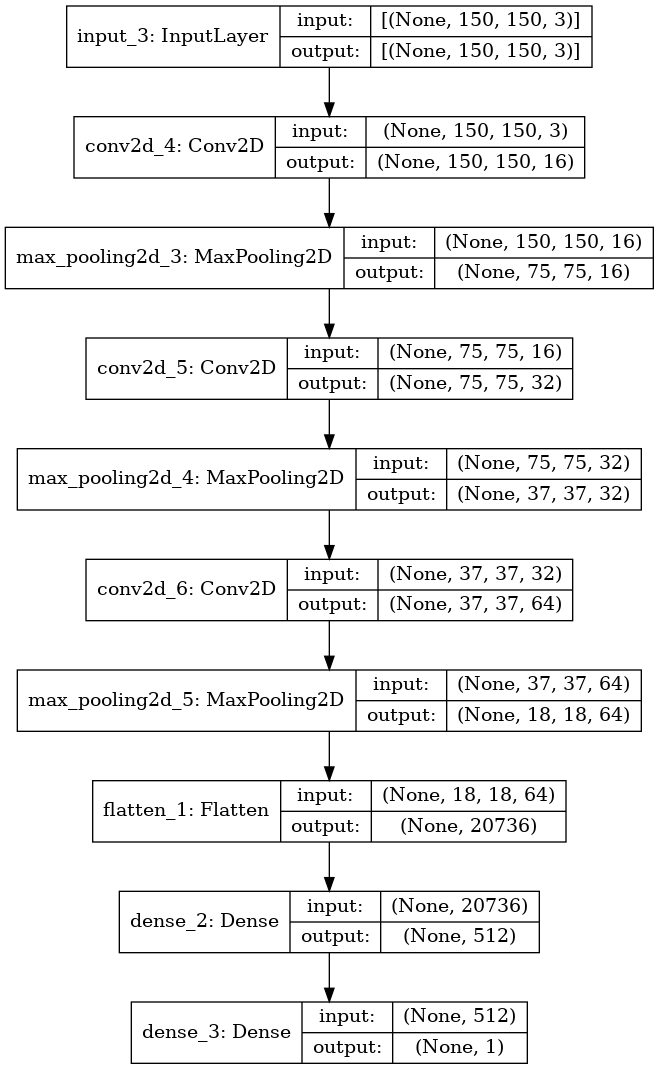

In [18]:
#モデルの詳細を確認
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [19]:
len(model.trainable_variables)


10

In [20]:
initial_epochs = 10
loss0, accuracy0 = model.evaluate(validation_dataset)

26/26 [==============================] - 2s 47ms/step - loss: 19.8285 - accuracy: 0.4825


In [21]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 19.33
initial accuracy: 0.50


In [22]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
63/63 [==============================] - 12s 181ms/step - loss: 13.7898 - accuracy: 0.5205 - val_loss: 0.9652 - val_accuracy: 0.6002
Epoch 2/10
63/63 [==============================] - 12s 181ms/step - loss: 0.8096 - accuracy: 0.6585 - val_loss: 0.9371 - val_accuracy: 0.6163
Epoch 3/10
63/63 [==============================] - 12s 180ms/step - loss: 0.6290 - accuracy: 0.7175 - val_loss: 0.8549 - val_accuracy: 0.6423
Epoch 4/10
63/63 [==============================] - 12s 181ms/step - loss: 0.5059 - accuracy: 0.7900 - val_loss: 0.8248 - val_accuracy: 0.6559
Epoch 5/10
63/63 [==============================] - 12s 180ms/step - loss: 0.4126 - accuracy: 0.8190 - val_loss: 1.1263 - val_accuracy: 0.6114
Epoch 6/10
63/63 [==============================] - 11s 178ms/step - loss: 0.2287 - accuracy: 0.9020 - val_loss: 0.8633 - val_accuracy: 0.6646
Epoch 7/10
63/63 [==============================] - 12s 180ms/step - loss: 0.1615 - accuracy: 0.9455 - val_loss: 0.8864 - val_accuracy: 0.673

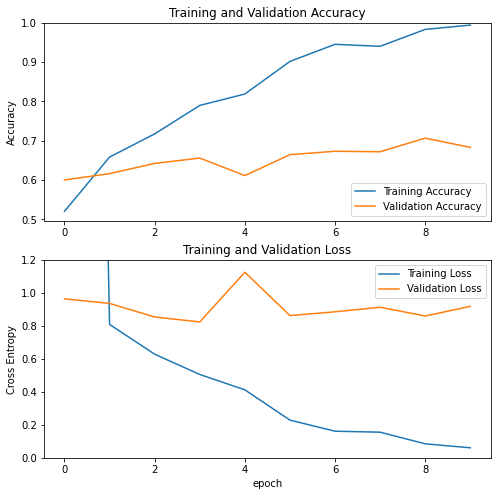

In [24]:
#学習曲線を描画
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.2])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

過学習していることがわかる